Author: Derek Jones & LINCC Frameworks team

Last updated: November 13, 2025

# Possible AGN problem 1 - how many SDSS AGN are there?

In [6]:
# Get SDSS AGN
# you can use wget, like in this example: https://github.com/lsst-sitcom/linccf/blob/main/internal/agn_variability/2025_jan/00-download_sdss_dr7qso.sh
# for instance wget https://das.sdss.org/va/qso_properties_dr7/data/catalogs/dr7_bh_June_2010.fits.gz
# transform into something that lsdb can ingest, like pandas df
# load into lsdb with lsdb.from_dataframe function
# crossmatch with photo-z catalog from Notebook 3
# are any of them in photo-z catalog?
# if yes, do photometric redshifts agree with each other? Do they agree with SDSS estimate?
# if no, is that resonable? Plot distributions of AGNs and Rubin DP1 coverage and compare

## Solution AGN problem 1

### Get SDSS AGN

You can use `wget` to get the data, following the pattern shown here:

https://github.com/lsst-sitcom/linccf/blob/main/internal/agn_variability/2025_jan/00-download_sdss_dr7qso.sh

...then transform it into something that LSDB can ingest.

In [7]:
# !wget https://das.sdss.org/va/qso_properties_dr7/data/catalogs/dr7_bh_June_2010.fits.gz

In [8]:
import astropy
from astropy.table import Table
import pandas as pd
import lsdb
import warnings
import dask
from dask.distributed import Client

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Jupyter-specific settings and magic commands
%matplotlib inline

# Configuration settings
warnings.simplefilter("ignore")
logging.getLogger("numexpr.utils").setLevel(logging.WARNING)
logging.getLogger("distributed").setLevel(logging.WARNING)
rcParams["savefig.dpi"] = 550
rcParams["font.size"] = 20
plt.rc("font", family="serif")
mpl.rcParams["axes.linewidth"] = 2
dask.config.set({"dataframe.convert-string": False})

In [9]:
data = Table.read('dr7_bh_June_2010.fits.gz')
pdata = data.to_pandas()
pdata

,SDSS_NAME,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,...,LOGBH_MGII_VO09,LOGBH_MGII_VO09_ERR,LOGBH_MGII_S10,LOGBH_MGII_S10_ERR,LOGBH_CIV_VP06,LOGBH_CIV_VP06_ERR,LOGBH,LOGBH_ERR,LOGEDD_RATIO,SPECIAL_INTEREST_FLAG
0,b'000006.53+003055.2',0.027228,0.515341,1.8246,685,467,52203,34603008,1,0,...,8.716234,0.529814,9.284316,0.193147,9.269005,0.135824,9.284316,0.193147,-1.348913,0
1,b'000008.13+001634.6',0.033900,0.276301,1.8373,685,470,52203,1048576,1,0,...,9.089737,0.200092,9.169480,0.172326,8.500652,0.067393,9.169480,0.172326,-0.893524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105781,b'235959.06-090944.0',359.996094,-9.162233,1.2834,650,448,52143,4,1,0,...,8.914797,0.034073,9.024543,0.035157,0.000000,-1.000000,9.024543,0.035157,-0.498561,0
105782,b'235959.44+000841.5',359.997681,0.144870,1.3542,1489,520,52991,33554432,1,0,...,8.717807,0.059179,8.725126,0.055435,0.000000,-1.000000,8.725126,0.055435,-1.052396,0


In [10]:
client = Client(n_workers=4, threads_per_worker=1, memory_limit="4GB")
# Print the dashboard link and port
print(f"Dask is running at: {client.dashboard_link}")

Dask is running at: https://nevencaplar.nb.data.lsst.cloud/nb/user/nevencaplar/proxy/44555/status


In [11]:
dr7_cat = lsdb.from_dataframe(pdata, ra_column="RA", dec_column="DEC")
dr7_cat

,SDSS_NAME,RA,DEC,REDSHIFT,PLATE,FIBER,MJD,TARGET_FLAG_TARGET,NSPECOBS,UNIFORM_TARGET,MI_Z2,LOGLBOL,LOGLBOL_ERR,BAL_FLAG,FIRST_FR_TYPE,FINT_REST6CM_MJY_OBS,LOGFNU2500A_ERGS_OBS,R_6CM_2500A,LOGL5100,LOGL5100_ERR,LOGL3000,LOGL3000_ERR,LOGL1350,LOGL1350_ERR,LOGL_BROAD_HA,LOGL_BROAD_HA_ERR,FWHM_BROAD_HA,FWHM_BROAD_HA_ERR,EW_BROAD_HA,EW_BROAD_HA_ERR,LOGL_NARROW_HA,LOGL_NARROW_HA_ERR,FWHM_NARROW_HA,FWHM_NARROW_HA_ERR,EW_NARROW_HA,EW_NARROW_HA_ERR,LOGL_NII_6585,LOGL_NII_6585_ERR,EW_NII_6585,EW_NII_6585_ERR,LOGL_SII_6718,LOGL_SII_6718_ERR,EW_SII_6718,EW_SII_6718_ERR,LOGL_SII_6732,LOGL_SII_6732_ERR,EW_SII_6732,EW_SII_6732_ERR,EW_FE_HA,EW_FE_HA_ERR,ALPHA_HA,ALPHA_HA_ERR,LINE_NPIX_HA,LINE_MED_SN_HA,LINE_REDCHI2_HA,LOGL_BROAD_HB,LOGL_BROAD_HB_ERR,FWHM_BROAD_HB,FWHM_BROAD_HB_ERR,EW_BROAD_HB,EW_BROAD_HB_ERR,LOGL_NARROW_HB,LOGL_NARROW_HB_ERR,FWHM_NARROW_HB,FWHM_NARROW_HB_ERR,EW_NARROW_HB,EW_NARROW_HB_ERR,FWHM_BROAD_HB_1GAUSS,LOGL_OIII_4959,LOGL_OIII_4959_ERR,EW_OIII_4959,EW_OIII_4959_ERR,LOGL_OIII_5007,LOGL_OIII_5007_ERR,EW_OIII_5007,EW_OIII_5007_ERR,EW_FE_HB_4434_4684,EW_FE_HB_4434_4684_ERR,ALPHA_HB,ALPHA_HB_ERR,LINE_NPIX_HB,LINE_MED_SN_HB,LINE_REDCHI2_HB,LOGL_MGII,LOGL_MGII_ERR,FWHM_MGII,FWHM_MGII_ERR,EW_MGII,EW_MGII_ERR,LOGL_BROAD_MGII,LOGL_BROAD_MGII_ERR,FWHM_BROAD_MGII,FWHM_BROAD_MGII_ERR,EW_BROAD_MGII,EW_BROAD_MGII_ERR,FWHM_BROAD_MGII_1GAUSS,EW_FE_MGII,EW_FE_MGII_ERR,ALPHA_MGII,ALPHA_MGII_ERR,LINE_NPIX_MGII,LINE_MED_SN_MGII,LINE_REDCHI2_MGII,LOGL_CIV,LOGL_CIV_ERR,FWHM_CIV,FWHM_CIV_ERR,EW_CIV,EW_CIV_ERR,ALPHA_CIV,ALPHA_CIV_ERR,LINE_NPIX_CIV,LINE_MED_SN_CIV,LINE_REDCHI2_CIV,VOFF_BROAD_HA,VOFF_BROAD_HA_ERR,VOFF_NARROW_HA,VOFF_NARROW_HA_ERR,VOFF_BROAD_HB,VOFF_BROAD_HB_ERR,VOFF_NARROW_HB,VOFF_NARROW_HB_ERR,VOFF_BROAD_MGII,VOFF_BROAD_MGII_ERR,VOFF_CIV_PEAK,VOFF_CIV_PEAK_ERR,LOGBH_HB_MD04,LOGBH_HB_MD04_ERR,LOGBH_HB_VP06,LOGBH_HB_VP06_ERR,LOGBH_MGII_MD04,LOGBH_MGII_MD04_ERR,LOGBH_MGII_VO09,LOGBH_MGII_VO09_ERR,LOGBH_MGII_S10,LOGBH_MGII_S10_ERR,LOGBH_CIV_VP06,LOGBH_CIV_VP06_ERR,LOGBH,LOGBH_ERR,LOGEDD_RATIO,SPECIAL_INTEREST_FLAG
npartitions=12,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Order: 0, Pixel: 0",binary[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],double[pyarrow],int32[pyarro

### Crossmatch with Rubin data

In [12]:
# are any of them in photo-z catalog?
# if yes, do photometric redshifts agree with each other? Do they agree with SDSS estimate?
# if no, is that reasonable? Plot distributions of AGNs and Rubin DP1 coverage and compare

Now crossmatch this new catalog with the photo-z one we used in Notebook 3.

In [13]:
PATH_PHOTOZ = "/rubin/lsdb_data/object_photoz/"
dp1_pz_catalog = lsdb.open_catalog(PATH_PHOTOZ)

(<Figure size 900x500 with 1 Axes>,
 <WCSAxes: title={'center': 'Points in the object_photoz catalog'}>)

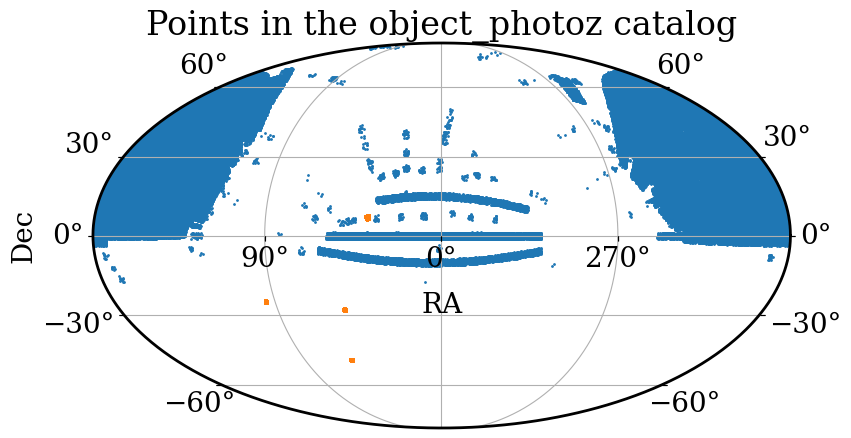

In [14]:
dr7_cat.plot_points(s=1)
dp1_pz_catalog.plot_points(s=1)

It doesn't look like they overlap, but we can try the crossmatch anyway.

In [15]:
try:
    dr7_x_pz = dr7_cat.crossmatch(dp1_pz_catalog)
    dr7_x_pz
except Exception as e:
    print(e)

Catalogs do not overlap


No, the catalogs have nothing in common since they don't overlap.

In [16]:
client.close()

# Possible AGN problem 2 - crossmatch large number of AGN

In [17]:
# Get MiliQuas catalog from https://quasars.org/milliquas.htm
# transform into something that lsdb can ingest, like pandas df
# load into lsdb with lsdb.from_dataframe function
# crossmatch with DP1 object collections 
# get all AGN that you can find
# crossmatch with DP1 dia_object collections 
# get all AGN that you can find
# What is the difference in the number of objects and dia_objects you have found?

## Solution AGN problem 2

In [21]:
# !wget https://quasars.org/milliquas.fits.zip

--2025-11-13 18:31:39--  https://quasars.org/milliquas.fits.zip
Resolving quasars.org (quasars.org)... 112.109.82.97
Connecting to quasars.org (quasars.org)|112.109.82.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42036570 (40M) [application/zip]
Saving to: ‘milliquas.fits.zip’

milliquas.fits.zip  100%[===================>]  40.09M  9.37MB/s    in 4.3s    

2025-11-13 18:31:44 (9.37 MB/s) - ‘milliquas.fits.zip’ saved [42036570/42036570]



In [22]:
# astropy.Table.read can handle .gz compression but not .zip
# !unzip milliquas.fits.zip

Archive:  milliquas.fits.zip
  inflating: milliquas.fits          


In [23]:
mdata = Table.read("milliquas.fits")
pmdata = mdata.to_pandas()
pmdata

,RA,DEC,NAME,TYPE,RMAG,BMAG,COMMENT,R,B,Z,CITE,ZCITE,XNAME,RNAME,LOBE1,LOBE2
0,0.000629,35.517844,b'SDSS J000000.15+353104.2 ',b'Q ',17.93,19.000000,b'pG ',b'-',b'-',0.845,b'DR16Q ',b'DR16 ',NaN,NaN,NaN,NaN
1,0.000657,-20.074344,b'UVQSJ000000.15-200427.7 ',b'AX ',17.90,18.459999,b'pG ',b'-',b'1',0.291,b'UVQS ',b'UVQS ',b'LSXPS J000000.1-200426',NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021798,359.999746,20.721087,b'SDSS J235959.94+204315.8 ',b'Q ',20.27,20.350000,b'gG ',b'-',b'-',2.010,b'DR16Q ',b'DR16 ',NaN,NaN,NaN,NaN
1021799,359.999954,34.747133,b'SDSS J235959.98+344449.6 ',b'Q ',20.57,20.879999,b'g ',b'-',b'-',2.375,b'DR16Q ',b'DR16Q ',NaN,NaN,NaN,NaN


In [24]:
client = Client(n_workers=1, threads_per_worker=1, memory_limit="16GB")
# Print the dashboard link and port
print(f"Dask is running at: {client.dashboard_link}")

Dask is running at: https://nevencaplar.nb.data.lsst.cloud/nb/user/nevencaplar/proxy/44323/status


In [25]:
m_cat = lsdb.from_dataframe(pmdata, ra_column="RA", dec_column="DEC")
m_cat

,RA,DEC,NAME,TYPE,RMAG,BMAG,COMMENT,R,B,Z,CITE,ZCITE,XNAME,RNAME,LOBE1,LOBE2
npartitions=12,,,,,,,,,,,,,,,,
"Order: 0, Pixel: 0",double[pyarrow],double[pyarrow],binary[pyarrow],binary[pyarrow],float[pyarrow],float[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow],float[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow],binary[pyarrow]
"Order: 0, Pixel: 1",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 0, Pixel: 10",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 0, Pixel: 11",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [26]:
PATH_OBJ = "/rubin/lsdb_data/object_collection/"
PATH_DIA_OBJ = "/rubin/lsdb_data/dia_object_collection/"
obj_catalog = lsdb.open_catalog(PATH_OBJ)
dia_catalog = lsdb.open_catalog(PATH_DIA_OBJ)

In [27]:
m_x_dp1_obj = m_cat.crossmatch(obj_catalog, radius_arcsec=0.1)

In [28]:
%%time
m_x_dp1_obj_c = m_x_dp1_obj.compute()
m_x_dp1_obj_c

CPU times: user 8.12 s, sys: 474 ms, total: 8.59 s
Wall time: 1min 19s


RA_from_lsdb_dataframe  DEC_from_lsdb_dataframe  \
_healpix_29                                                            
9583286184997455                  37.784846                 6.401708   
9589207111743847                  38.493228                  6.42792   
...                                     ...                      ...   
2530266678998616679               53.066504               -27.577352   
2531113080423514090               40.491485               -34.346719   

                         NAME_from_lsdb_dataframe TYPE_from_lsdb_dataframe  \
_healpix_29                                                                  
9583286184997455     b'LAMOSTJ023108.36+062406.2'                  b'Q   '   
9589207111743847     b'LAMOSTJ023358.37+062540.4'                  b'QR  '   
...                                           ...                      ...   
2530266678998616679  b'WCDFS J033215.96-273438.4'                  b'A   '   
2531113080423514090  b'Q J0241-3420             '                  b'Q   '   

                     RMAG_from_lsdb_dataframe  BMAG_from_lsdb_dataframe  \
_healpix_29                                                               
9583286184997455                    19.389999                     19.73   
9589207111743847                        18.83                     20.26   
...                                       ...                       ...   
2530266678998616679                 22.940001                 24.559999   
2531113080423514090                 18.290001                 18.959999   

                    COMMENT_from_lsdb_dataframe R_from_lsdb_dataframe  \
_healpix_29                                                             
9583286184997455                         b'pG '                  b'-'   
9589207111743847                         b'jG '                  b'1'   
...                                         ...                   ...   
2530266678998616679                      b'd  '                  b'n'   
2531113080423514090                      b'jG '                  b'-'   

                    B_from_lsdb_dataframe  Z_from_lsdb_dataframe  ...  \
_healpix_29                                                       ...   
9583286184997455                     b'-'                  1.404  ...   
9589207111743847                     b'-'                  3.932  ...   
...                                   ...                    ...  ...   
2530266678998616679                  b'n'                  0.742  ...   
2531113080423514090                  b'-'                   1.43  ...   

                    y_psfFluxErr_object_lc y_psfMag_object_lc  \
_healpix_29                                                     
9583286184997455                      <NA>               <NA>   
9589207111743847                      <NA>               <NA>   
...                                    ...                ...   
2530266678998616679             936.135132          21.656466   
2531113080423514090                   <NA>               <NA>   

                    y_psfMagErr_object_lc yErr_object_lc z_psfFlux_object_lc  \
_healpix_29                                                                    
9583286184997455                     <NA>       0.006627        56795.382812   
9589207111743847                     <NA>       0.008974        82239.742188   
...                                   ...            ...                 ...   
2530266678998616679              0.129329        0.06311         5985.897949   
2531113080423514090                  <NA>       0.003418                <NA>   

                    z_psfFluxErr_object_lc  z_psfMag_object_lc  \
_healpix_29                                                      
9583286184997455                319.930939           19.514217   
9589207111743847                318.370789           19.112295   
...                                    ...                 ...   
2530266678998616679             110.244308           21.957176   
253111

In [29]:
m_x_dp1_dia_obj = m_cat.crossmatch(dia_catalog, radius_arcsec=0.1)

In [30]:
%%time
m_x_dp1_dia_obj_c = m_x_dp1_dia_obj.compute()
m_x_dp1_dia_obj_c

CPU times: user 3.92 s, sys: 372 ms, total: 4.29 s
Wall time: 45.2 s


RA_from_lsdb_dataframe  DEC_from_lsdb_dataframe  \
_healpix_29                                                            
9634690503536659                   37.66109                 6.892362   
9634023935333667                  37.737799                 6.851331   
...                                     ...                      ...   
2531129991528497196               39.887023               -34.423677   
2531133272813440885               39.954219               -34.333329   

                         NAME_from_lsdb_dataframe TYPE_from_lsdb_dataframe  \
_healpix_29                                                                  
9634690503536659     b'LAMOSTJ023038.67+065332.6'                  b'QRX '   
9634023935333667     b'WISEA J023057.06+065104.7'                  b'RX  '   
...                                           ...                      ...   
2531129991528497196  b'1WGA J0239.5-3425        '                  b'QX  '   
2531133272813440885  b'Q J0239-3420             '                  b'AX  '   

                     RMAG_from_lsdb_dataframe  BMAG_from_lsdb_dataframe  \
_healpix_29                                                               
9634690503536659                    18.559999                     18.77   
9634023935333667                    18.889999                     19.43   
...                                       ...                       ...   
2531129991528497196                      19.1                 19.700001   
2531133272813440885                     19.35                 19.200001   

                    COMMENT_from_lsdb_dataframe R_from_lsdb_dataframe  \
_healpix_29                                                             
9634690503536659                         b'pG '                  b'-'   
9634023935333667                         b'pG '                  b'-'   
...                                         ...                   ...   
2531129991528497196                      b'jG '                  b'-'   
2531133272813440885                      b'jG '                  b'1'   

                    B_from_lsdb_dataframe  Z_from_lsdb_dataframe  ...  \
_healpix_29                                                       ...   
9634690503536659                     b'-'                  1.167  ...   
9634023935333667                     b'-'                    0.4  ...   
...                                   ...                    ...  ...   
2531129991528497196                  b'n'                  0.947  ...   
2531133272813440885                  b'1'                  0.325  ...   

                     LOBE2_from_lsdb_dataframe dec_dia_object_lc  \
_healpix_29                                                        
9634690503536659     b'NVSS J023038.8+065328 '          6.892377   
9634023935333667     b'RACS J023057.0+065105 '           6.85133   
...                                        ...               ...   
2531129991528497196                       <NA>         -34.42367   
2531133272813440885                       <NA>         -34.33333   

                    diaObjectId_dia_object_lc nDiaSources_dia_object_lc  \
_healpix_29                                                               
9634690503536659           648366270139334687                        26   
9634023935333667           648365514225090590                        29   
...                                       ...                       ...   
2531129991528497196        604064129157695018                         4   
2531133272813440885        604064129157694846                         1   

                    ra_dia_object_lc radecMjdTai_dia_object_lc  \
_healpix_29                                                      
9634690503536659            37.66109              60652.096069   
9634023935333667           37.737804              60652.094458   
...                              ...                       ...   
2531129991528497196        39.887007              60650.185754   
2531133272813440885 

In [ ]:
# 86 matchees with dia catalog, 600+ with object catalog!!

# Possible AGN problem 3 - run a function accross AGN lightcurves

In [ ]:
# Ok, now you have some lightcurves. Lets run a function over these lightcurves

# get EzTao from  https://github.com/ywx649999311/EzTao
# fit drw fit (drw_fit(t, y, yerr)) to the longest lightcurves that you can find (e.g., fit red band lightcurves with more than 200 observations)

## Solution AGN problem 3

In [ ]:
# !pip install git+https://github.com/ywx649999311/EzTao.git

In [ ]:
from eztao.ts import drw_fit

In [ ]:
m_x_dp1_obj_c['objectForcedSource_object_lc']

In [ ]:
m_x_dp1_obj_c_red = m_x_dp1_obj_c.query('objectForcedSource_object_lc.band == "r"')

In [ ]:
from nested_pandas.utils import count_nested

m_x_dp1_obj_c_red_ct = count_nested(m_x_dp1_obj_c_red, "objectForcedSource_object_lc")
long_light = m_x_dp1_obj_c_red_ct.query("n_objectForcedSource_object_lc > 200")
long_light

In [ ]:
%%time
def do_fit(lc_nest_in):
    lc_nest = lc_nest_in.dropna()
    coeffs = drw_fit(lc_nest["midpointMjdTai"].to_numpy(), lc_nest["psfMag"], lc_nest["psfMagErr"])
    drw_0, drw_1 = coeffs
    return { "drw_0": drw_0, "drw_1": drw_1 }

fits = long_light.reduce(do_fit, "objectForcedSource_object_lc")
fits